# 1 data preparation

In [1]:
import os
from zipfile import ZipFile

# app.py
# call api 
# 1. According to kaggle website, api call require install package in pip -> pip install )
# 2. After install go to kaggle account page  https://www.kaggle.com/<username>/account to get api token
# 3. Place downloaded json file C:\Users\<Windows-username>\.kaggle\kaggle.json
os.system("kaggle datasets download -d olistbr/brazilian-ecommerce")
with ZipFile('brazilian-ecommerce.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()


os.system("kaggle datasets download -d olistbr/marketing-funnel-olist")
with ZipFile('marketing-funnel-olist.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('max_colwidth',100)

customers=pd.read_csv('olist_customers_dataset.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
translation=pd.read_csv('product_category_name_translation.csv')

#Concatenating DataFrames
order_merge_list=[order_items,order_payments,order_reviews]

for item in order_merge_list:
    orders=pd.merge(orders,item,on='order_id',how='left')

orders=pd.merge(orders,products,on='product_id',how='left')

#translate to Englis
orders_full=pd.merge(orders,translation,on='product_category_name',how='left')

#Concat seller location data
sellers_geo=pd.merge(sellers,geolocation,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

#Concat customer location data
customers_geo=pd.merge(customers,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [4]:
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [5]:
orders_full.to_csv(r'olist_orders_full.csv')

In [6]:
#set the readable time 
date_cols=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date' ,'order_estimated_delivery_date','shipping_limit_date','review_creation_date','review_answer_timestamp']
for item in date_cols:
    orders_full[item]=pd.to_datetime(orders_full[item])
orders_full.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   order_item_id                  118318 non-null  float64       
 9   product_id                     118318 non-null  object        
 10  seller_id                      118318 non-null  object        
 11  

In [7]:
orders_full.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data ...,2017-12-03,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,papelaria,38.0,316.0,

# 2 Orders analysis

which product catogory has the most revenue

In [8]:
## Data Cleansing

translation.product_category_name_english.unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

## **There is no blank product category

#Top category selling amount 

Top 10: bed_bath_table

health_beauty

sport_leisure

furniture_decor

computers_accessories

housewares

watches_gifts

telephony

garden_tools

auto


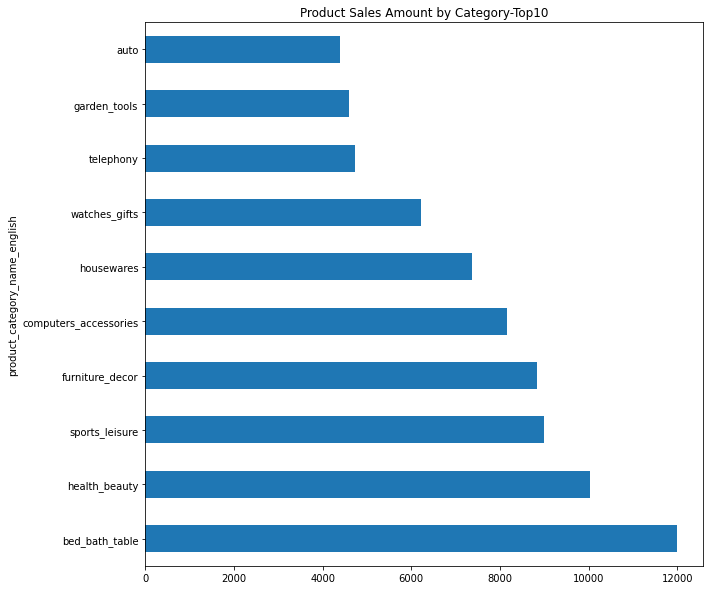

In [9]:
plt.subplots()
product_counts=orders_full.groupby(['product_category_name_english']).size().sort_values().nlargest(10)
product_counts.plot(kind='barh',figsize=(10,10),title='Product Sales Amount by Category-Top10')
plt.style.use('ggplot')

In [10]:
product_count_df = product_counts.to_frame('Sales Amount').reset_index()
#to make indext starts from 1
#product_count_df.index = product_count_df.index + 1
product_count_df

,product_category_name_english,Sales Amount
0,bed_bath_table,11990
1,health_beauty,10033
2,sports_leisure,9005
3,furniture_decor,8833
4,computers_accessories,8151
5,housewares,7380
6,watches_gifts,6213
7,telephony,4726
8,garden_tools,4590
9,auto,4400


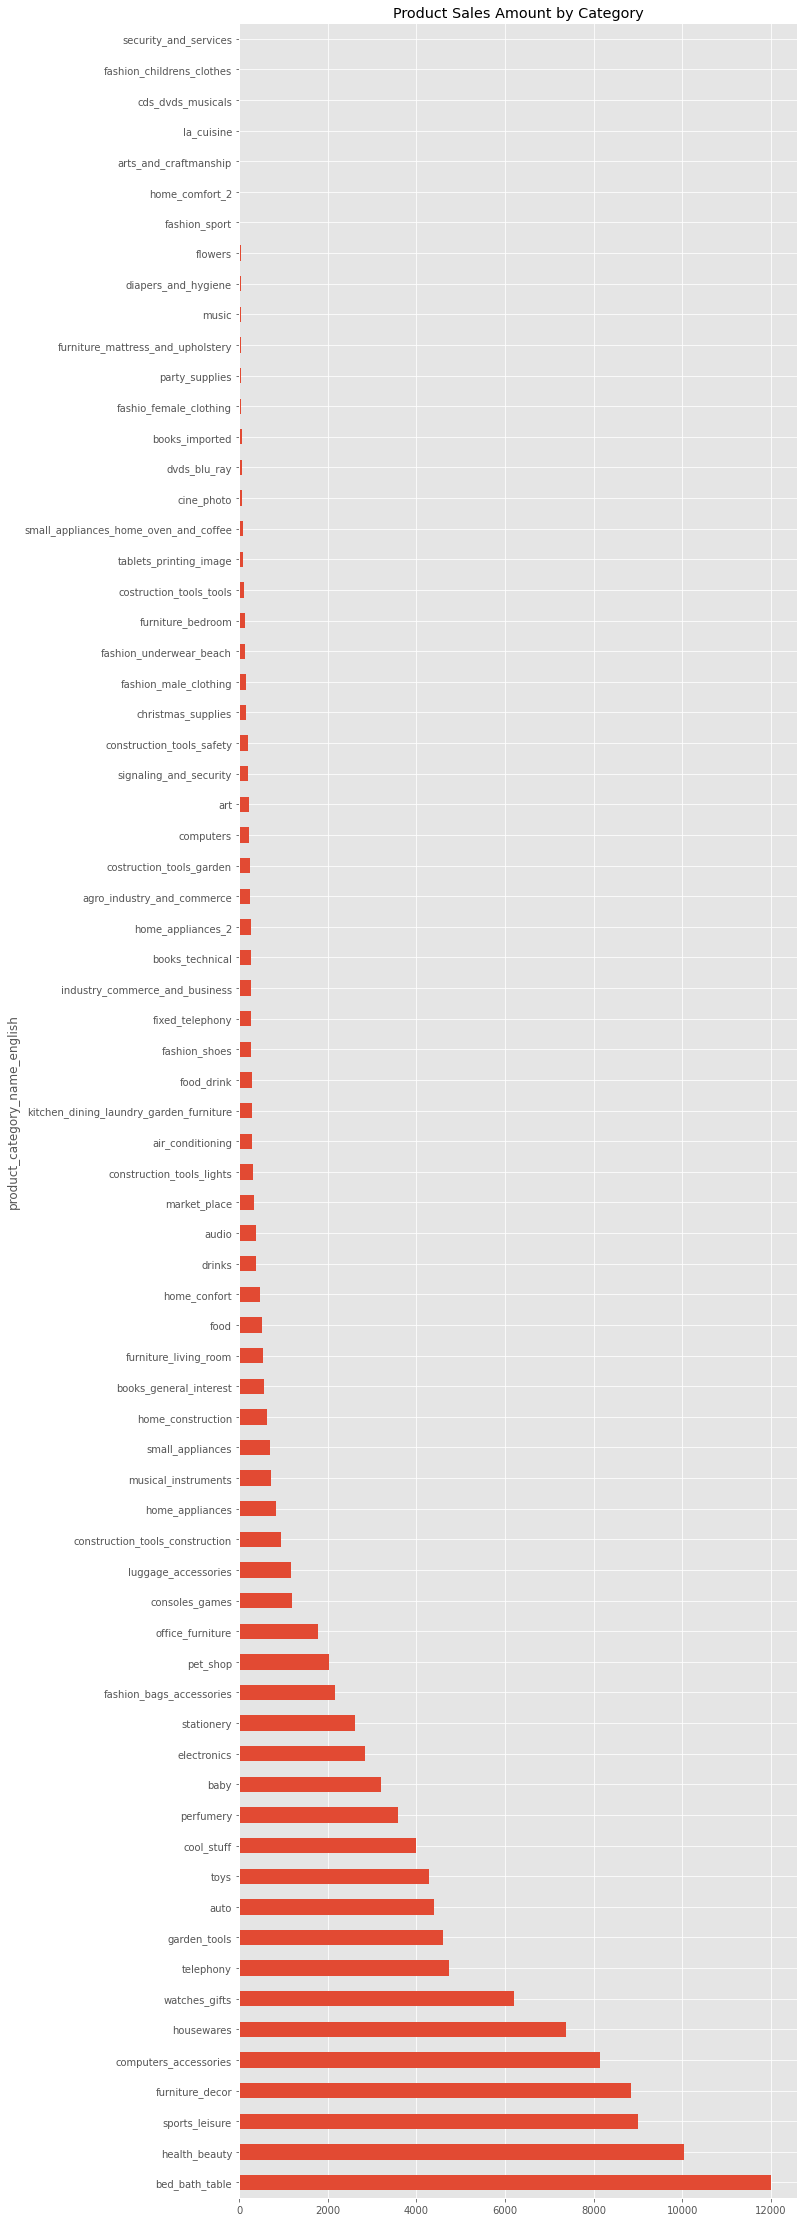

In [11]:
plt.subplots()
product_count_all=orders_full.groupby(['product_category_name_english']).size().sort_values(ascending=False)
product_count_all.plot(kind='barh',figsize=(10,40),title='Product Sales Amount by Category')
plt.style.use('ggplot')

In [12]:
product_count_all_df = product_count_all.to_frame('Sales Amount').reset_index()

# Top category Sales revenue 
Top 10: health_beauty

watches_gifts

bed_bath_table

sports_leisure

computers_accessories

furniture_decor

housewares

cool_stuff

auto

garden_tools


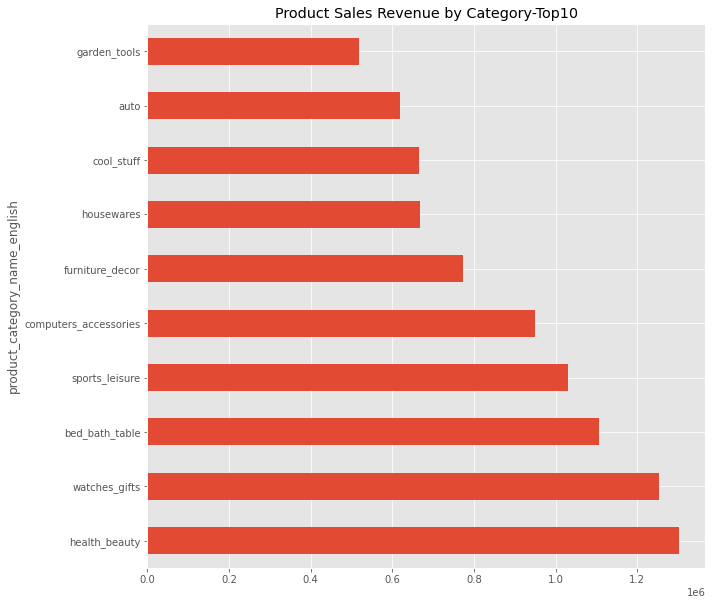

In [13]:
poductPrice_sum = orders_full.groupby(['product_category_name_english'])['price'].agg('sum').sort_values().nlargest(10)
poductPrice_sum.plot(kind='barh',figsize=(10,10),title='Product Sales Revenue by Category-Top10')
plt.style.use('ggplot')

In [14]:
product_sum_df = poductPrice_sum.to_frame('Revenue').reset_index()
#to make indext starts from 1
#product_sum_df.index = product_sum_df.index + 1
product_sum_df

,product_category_name_english,Revenue
0,health_beauty,1302046.97
1,watches_gifts,1254322.95
2,bed_bath_table,1107397.98
3,sports_leisure,1029631.88
4,computers_accessories,950134.59
5,furniture_decor,772496.16
6,housewares,668880.94
7,cool_stuff,664637.13
8,auto,618395.50
9,garden_tools,519473.33


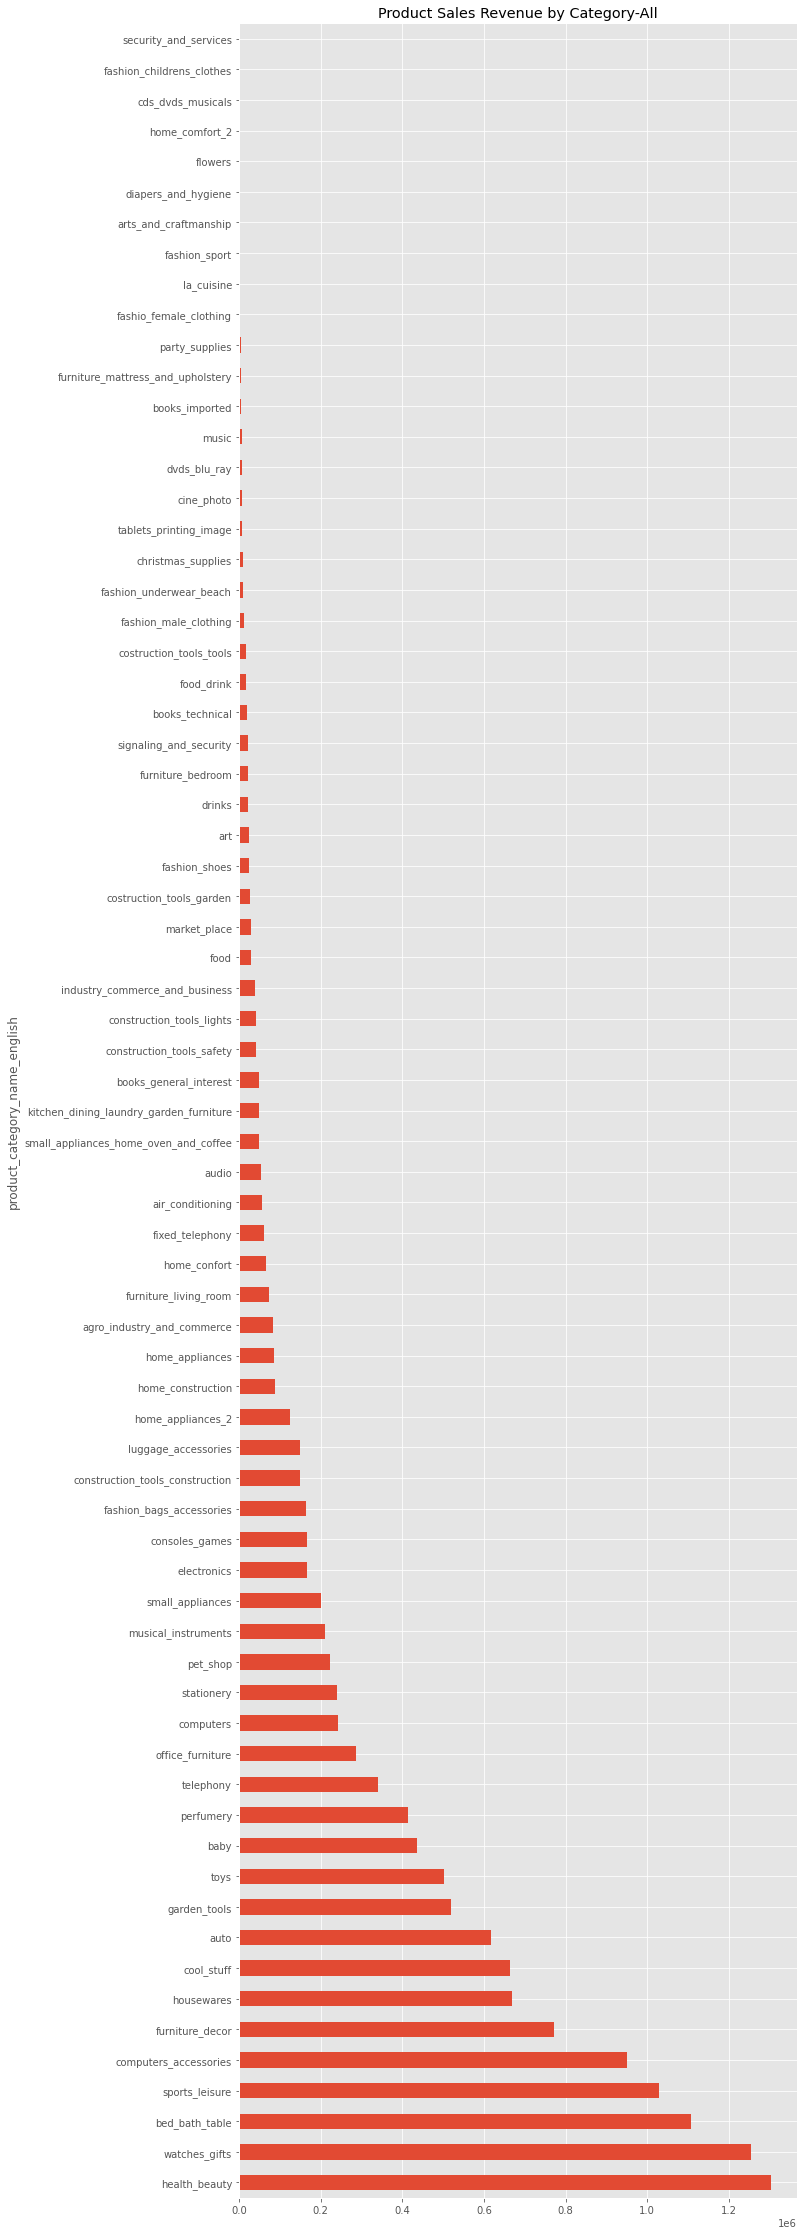

In [15]:
poductPrice_sum_all = orders_full.groupby(['product_category_name_english'])['price'].agg('sum').sort_values(ascending=False)
poductPrice_sum_all.plot(kind='barh',figsize=(10,40),title='Product Sales Revenue by Category-All')
plt.style.use('ggplot')

In [16]:
product_sum_all_df = poductPrice_sum_all.to_frame('Revenue').reset_index()

## Relationship between Sales Revenue and Sales Amount -- heatmap

<AxesSubplot:>

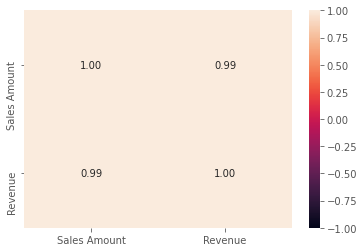

In [17]:
import seaborn as sb

# Create a joint dataframe by concatenating the two variables
Revenue=pd.DataFrame(product_sum_all_df['Revenue'])
Amount=pd.DataFrame(product_count_all_df['Sales Amount'])
join = pd.concat([Amount,Revenue,], axis = 1).reindex(Amount.index)

sb.heatmap(join.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")


In [18]:
join.corr()

,Sales Amount,Revenue
Sales Amount,1.000000,0.994188
Revenue,0.994188,1.000000


## Sales Revenue and Sales Amount: Strong relationship

------------------------------------------------------------------------------------

## Concate Top 10 sales amount and sales revenue

In [19]:
Left_join = pd.merge(product_sum_df, 
                     product_count_all_df, 
                     on ='product_category_name_english', 
                     how ='left')
Left_join

,product_category_name_english,Revenue,Sales Amount
0,health_beauty,1302046.97,10033
1,watches_gifts,1254322.95,6213
2,bed_bath_table,1107397.98,11990
3,sports_leisure,1029631.88,9005
4,computers_accessories,950134.59,8151
5,furniture_decor,772496.16,8833
6,housewares,668880.94,7380
7,cool_stuff,664637.13,3999
8,auto,618395.50,4400
9,garden_tools,519473.33,4590


#

## Analysis regarding Product category on Sales Revenue and Sales Amount

### Top Line Product Category Hierarchy 1 : `health_beauty`, `watches_gifts`, `bed_bath_table`, `sports_leisure`
As we can see, except `cool_stuff`, the rest products are in both top 10 Sales Revenue and top 10 Sales Amount. 

`health_beauty` and `bed_bath_table` both have superior performance in Sales Revenue and Sales Amount. 

`health_beauty` Sales Revenue: rank 1st with $1302046.97; Sales Amount rank 2nd, with 10033(5 digits);

### Good potential product:`watches_gifts`, `sports_leisure`

`bed_bath_table` Sales Revenue: rank 3rd with $1107397.98; Sales Amount rank 1st with 11990(5 digits);

`watches_gifts` has a superior performance in Sales Revenue with $1107397.98, ranking with 2nd. While we can see it's Sales Amount ranks 7th with 6213(4 digits). Which means the product unit price is high. There is a potential for `watches_gifts` to improve Sales Amount in FY19 to gain more Revenue.

`sports_leisure` has a superior performance in Sales Revenue with $1029631.88., with ranking 4th. While we can see it's Sales Amount ranks 7th with 9005(4 digits).Same As `watches_gifts`, it's Sales Amount can be improved in FY19.

--------------------------------------------------------------------------------------------------------

## Top Line Product Category Hierarchy 2: `computers_accessories`, `furniture_decor`, `housewares`

`computers_accessories`, `furniture_decor`, `housewares` are having good performance in Sales Revenue and Sales Amount. Their Sales Revenue are in between $660k to $950k. Their Sales amount ranking are 3rd to 6th. 

### Good potential product:`computers_accessories`

`computers_accessories` Sales Revenue are close to $1000k, there is a potential that it can improve the Sales Revenue and Sales Amount, so that it can go in Top Line Product Category Hierarchy 1.



--------------------------------------------------------------------------------------------------------

## Top Line Product Category Hierarchy 3: `cool_stuff`, `auto`, `garden_tools`

`cool_stuff`, `auto`, `garden_tools` are having fair good performance in Sales Revenue and Sales Amount. Sales Revenue are between $500k to $660k, Sales Amount are ranking 12th, 10th, 9th. 

### Good potential product:`cool_stuff`
`cool_stuff` is the only product Sales Amount out of Top 10, while it's Sales revenue are in Top 10. Which means it's product unit prive is fair high. There is a potential that it can improve the Sales Amount in FY19 to gain more Revenue.


--------------------------------------------------------------------------------------------------------

## Seansonal Product

In [20]:
Order_by_Quarter=orders_full.copy()
Order_by_Quarter.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                    

In [21]:
#change order_purchase_timestamp object type to date time
Order_by_Quarter['order_purchase_timestamp']=Order_by_Quarter['order_purchase_timestamp'].apply(pd.to_datetime)
Order_by_Quarter.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                    

In [22]:
#change order_purchase_timestamp date time to Quarter, and show as format'Q1''Q2''Q3''Q4
Order_by_Quarter['order_purchase_timestamp'] = Order_by_Quarter['order_purchase_timestamp'].dt.to_period("Q")
Order_by_Quarter['order_purchase_timestamp'] = Order_by_Quarter['order_purchase_timestamp'].astype(str).str[-2:]
#Check Quarter format:
Order_by_Quarter.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,Q4,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,Q4,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,Q4,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,Q3,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,Q3,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,Q4,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data ...,2017-12-03,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,Q1,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,Q3,20

In [23]:
# Calculate Sales Revenue by Quarter and sort the top 10
#Q1
Order_by_Quarter_Q1 = pd.DataFrame(Order_by_Quarter[Order_by_Quarter['order_purchase_timestamp']==('Q1')])
#Order_by_Quarter_Q1.head(10)
Order_by_Quarter_Q1_sum = Order_by_Quarter_Q1.groupby(['product_category_name_english'])['price'].agg('sum').sort_values().nlargest(10)
Order_by_Quarter_Q1_sum.to_frame('Q1 Sales Revenue').reset_index()

,product_category_name_english,Q1 Sales Revenue
0,health_beauty,324729.40
1,computers_accessories,322707.61
2,sports_leisure,322322.77
3,watches_gifts,294718.51
4,bed_bath_table,270884.53
5,furniture_decor,217031.99
6,cool_stuff,159989.99
7,auto,159486.70
8,housewares,150968.34
9,garden_tools,134342.27


In [24]:
#Q2
Order_by_Quarter_Q2 = pd.DataFrame(Order_by_Quarter[Order_by_Quarter['order_purchase_timestamp']==('Q2')])
Order_by_Quarter_Q2_sum = Order_by_Quarter_Q2.groupby(['product_category_name_english'])['price'].agg('sum').sort_values().nlargest(10)
Order_by_Quarter_Q2_sum.to_frame('Q2 Sales Revenue').reset_index()


,product_category_name_english,Q2 Sales Revenue
0,watches_gifts,411564.48
1,health_beauty,406278.63
2,bed_bath_table,330360.51
3,sports_leisure,274743.02
4,computers_accessories,272208.59
5,housewares,233452.95
6,furniture_decor,226599.59
7,auto,212387.53
8,cool_stuff,185065.37
9,garden_tools,163960.77


In [25]:
#Q3
Order_by_Quarter_Q3 = pd.DataFrame(Order_by_Quarter[Order_by_Quarter['order_purchase_timestamp']==('Q3')])
Order_by_Quarter_Q3_sum = Order_by_Quarter_Q3.groupby(['product_category_name_english'])['price'].agg('sum').sort_values().nlargest(10)
Order_by_Quarter_Q3_sum.to_frame('Q3 Sales Revenue').reset_index()


,product_category_name_english,Q3 Sales Revenue
0,health_beauty,374332.39
1,bed_bath_table,306673.96
2,watches_gifts,300140.10
3,sports_leisure,247473.30
4,housewares,200015.75
5,computers_accessories,194142.31
6,furniture_decor,189137.73
7,cool_stuff,173059.37
8,auto,146251.67
9,computers,118678.87


In [26]:
#Q4
Order_by_Quarter_Q4 = pd.DataFrame(Order_by_Quarter[Order_by_Quarter['order_purchase_timestamp']==('Q4')])
Order_by_Quarter_Q4_sum = Order_by_Quarter_Q4.groupby(['product_category_name_english'])['price'].agg('sum').sort_values().nlargest(10)
Order_by_Quarter_Q4_sum.to_frame('Q4 Sales Revenue').reset_index()


,product_category_name_english,Q4 Sales Revenue
0,watches_gifts,247899.86
1,bed_bath_table,199478.98
2,health_beauty,196706.55
3,sports_leisure,185092.79
4,toys,166138.64
5,computers_accessories,161076.08
6,cool_stuff,146522.40
7,furniture_decor,139726.85
8,garden_tools,104246.35
9,auto,100269.60


## Seasnal Product Category Analysis


### Seasonal product:`toys` in Q4, `computers` in Q3


### Product Category doing good in whole seasons:
`health_beauty`, `sports_leisure`, `watches_gifts`, `bed_bath_table`: These 4 products category have superior in seansonal Sales Revenue. 

`furniture_decor`, `cool_stuff`, `auto`, `housewares`, `garden_tools`: These 5 products category have fair well in seasonal Sales Revenue.
